In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

##**Load Dataset**
Colab will download MNIST automatically on first run.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data size:", X_train.shape)
print("Training labels size:", y_train.shape)

print("\nX_test Size:", X_test.shape)
print("y_test Size:", y_test.shape)

#from the output 60000 images for training and 10000 for testing

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data size: (60000, 28, 28)
Training labels size: (60000,)

X_test Size: (10000, 28, 28)
y_test Size: (10000,)


##**Data Preprocessing**

In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


##**Build CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

##**Train Model**

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)


##**Evaluate on Test Data**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9886 - loss: 0.1069
Test Accuracy: 0.9908


##**only for Hari visualization , just print the first 5 images 👇**

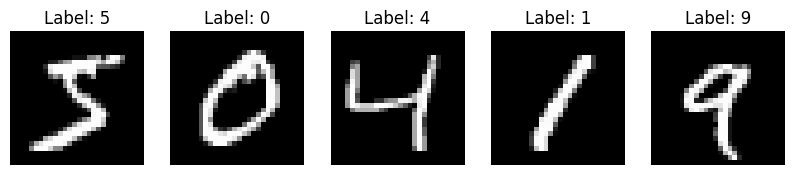

In [ ]:

plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')

plt.show()


##**Visualize Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
True label: 3
Model Predicted Digit: 3


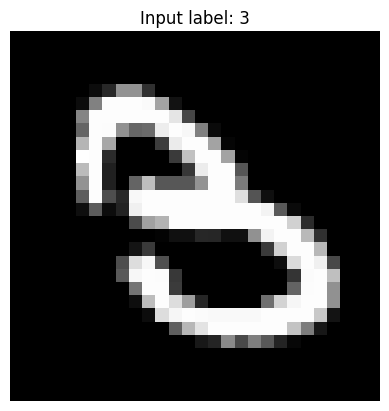

In [ ]:
index = 18
plt.title(f"Input label: {np.argmax(y_test[index])}")
plt.imshow(X_test[index].reshape(28,28), cmap='grey')
plt.axis('off')

prediction = model.predict(X_test[index].reshape(1,28,28,1))
# print(prediction)

print("True label:", np.argmax(y_test[index]))
print("Model Predicted Digit:", np.argmax(prediction))



In [ ]:
index = 15

print("One-hot label:", y_test[index]) #its like tape like structure
print("Actual digit:", np.argmax(y_test[index]))

#example output
# One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
# Actual digit: 5
### -- from 0 to 9 the model place the 1 at 5th index.


One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual digit: 5


In [ ]:
model.save("mnist_cnn_model.h5")

#or download the model 👇
from google.colab import files
files.download("mnist_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If we print the print(prediction)

[[5.96135086e-10 2.40492426e-08 5.93876992e-09 1.19179795e-07
  1.98286085e-04 9.51258485e-08 2.82062199e-12 3.29572991e-08
  5.79413245e-05 9.99743521e-01]]

###Here the output is 9 for the probability
  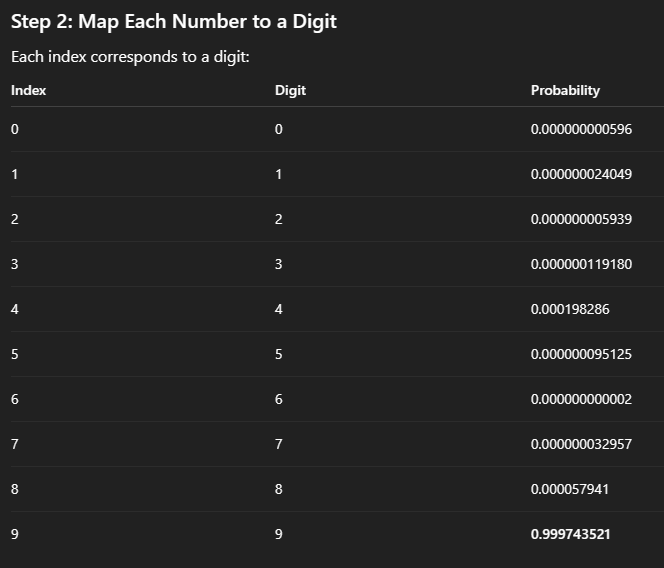


##**Test the model with custom input By Hari**

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("mnist_cnn_model.h5")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


##**Read and Preprocess the Image**

In [ ]:
# Load image in grayscale
img = cv2.imread("/content/digit_0.png", cv2.IMREAD_GRAYSCALE)


# Resize to 28x28
img = cv2.resize(img, (28, 28))

# Invert colors if background is white
# img = 255 - img

# Normalize
# img = img / 255.0

# Reshape for CNN
img = img.reshape(1, 28, 28, 1)


##**Visual Verification**

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

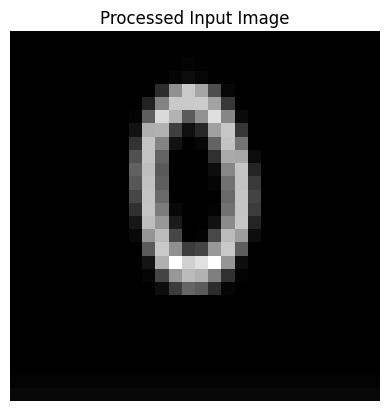

In [ ]:
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title("Processed Input Image")
plt.axis('off')


In [ ]:
prediction = model.predict(img)

digit = np.argmax(prediction)

print("Predicted Digit:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: 0
